# Prompted Bigraph-Builder Demo

In [1]:
from biosimulator_processes.biosimulator_builder import BiosimulatorBuilder, BuildPrompter

CobraProcess registered successfully.
CopasiProcess registered successfully.
SmoldynProcess registered successfully.
TelluriumProcess registered successfully.
DeterministicTimeCourseParameterScan not available. Error: cannot import name 'TimeCourseProcessConfig' from 'biosimulator_processes.data_model' (/Users/alex/Desktop/uchc_work/repos/biosimulator-processes/biosimulator_processes/data_model.py)


## The prompter workflow can be described in the following steps:

            1. Initialize the builder to use. We will use BiosimulatorBuilder for this repo.
            2. Initialize the prompter, passing at least the object generated from #1 and number of processes to add to the composite.
            3. The prompt will begin once the object from #2 is instanitated.

### 1. Initialize the builder

In [2]:
biosim_builder = BiosimulatorBuilder()  # TODO: Base OpenAPI spec for REST/swagger on the Builder: Perhaps a generalized Builder REST and BiosimBuilder REST?.
    

#### View the list of available processes (optional).

In [3]:
biosim_builder.list_processes()

['SmoldynProcess',
 'CobraProcess',
 'CopasiProcess',
 'console-emitter',
 'TelluriumProcess',
 'ram-emitter']

### 2. & 3. Instantiate the Build Prompter. The idea here is that there is a build prompter that uses references from a given Builder instance/implementation (in this case, BiosimulatorBuilder) to dynamically add registered processes to the bigraph. BuildPrompter exists as one of the classes in the highest-level BigraphBuilder API. Let's add a number of the same copasi processes to the composite as a simple way to start.

In [4]:
num = 1
prompter = BuildPrompter(builder_instance=biosim_builder, num_additions=num)

New prompter instance created!


#### NOTE: Input kwargs can be generated by the prompter via both kwarg and prompt

In [5]:
from bigraph_schema.registry import map_type_to_pydantic


t = map_type_to_pydantic('CopasiProcess')

t

object

In [6]:
CopasiProcessConfig = prompter.builder_instance.get_pydantic_model('CopasiProcess')

In [8]:
from biosimulator_processes.data_model import TimeCourseModel

tc_model = TimeCourseModel(model_source='BIOMD0000000391')

In [9]:
tc_model

TimeCourseModel(model_source='BIOMD0000000391', model_language='sbml', model_name='Unnamed TimeCourse Model', model_changes=None, model_units=None)

In [8]:
config = CopasiProcessConfig(model={'model_source': 'BIOMD0000000391'})

In [9]:
config.model_dump()

{'model': {'model_source': 'BIOMD0000000391'}, 'method': 'lsoda'}

In [5]:
arnold_poolman_biomodel_id = 'BIOMD0000000391'
hockin_1999 = 'BIOMD0000000365'
process_kwargs = {
    'model': {'model_source': arnold_poolman_biomodel_id}
}

# model={'model_source': 'BIOMD0000000364'}
input_kwargs = prompter.generate_input_kwargs() # **process_kwargs

Input kwargs generated: {}


### Start the prompter

Run request initiated...
1 processes will be added to the bi-graph.

All processes will be connected as well.
Key: model, val: {'model_source': 'BIOMD0000000364'}
Input kwargs generated: {'model': {'model_source': 'BIOMD0000000364'}}
simple_lsoda process successfully added to the bi-graph!

All nodes including the most recently added simple_lsoda processes connected!

Done adding single simple_lsoda (CopasiProcess) to the bigraph.

All processes added.
File 'simple_lsoda' successfully written in 'out' directory.
Composition written to document!
This is the composite: 


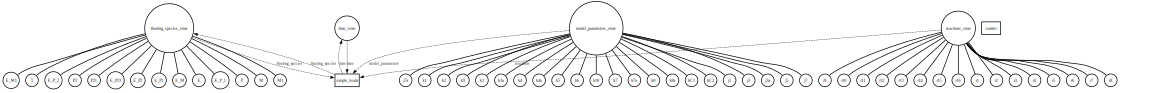

In [6]:
# add processes
prompter.start()

In [7]:
# run composition
duration = None  # we will be prompted if this is passed.
prompter.run(num=num, duration=duration)

Generating composite...
Composite generated!
Running generated composite for an interval of 100


/Users/alex/Desktop/uchc_work/repos/biosimulator-processes/biosimulator_processes/processes/copasi_process.py:226: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Composite successfully run. Request complete. Done.


### Visualize the process composition

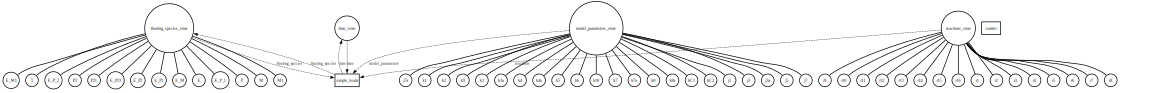

In [13]:
prompter.visualize_bigraph()

In [14]:
prompter.builder_instance

Builder({ 'emitter': { '_type': 'step',
               'address': 'local:ram-emitter',
               'config': {'emit': {}},
               'inputs': {},
               'instance': <process_bigraph.composite.RAMEmitter object at 0x2939fbb80>,
               'outputs': {}},
  'floating_species_store': { 'E': 0.0,
                              'E_M': 0.0,
                              'E_M1': 0.0,
                              'E_P1': 0.0,
                              'E_P2': 0.0,
                              'E_P21': 0.0,
                              'E_P_1': 0.0,
                              'E_P_2': 0.0,
                              'M': 0.0,
                              'M1': 0.0,
                              'P': 0.0,
                              'P2': 0.0,
                              'P21': 0.0,
                              'T': 0.0},
  'global_time': 100.0,
  'model_parameters_store': { 'j1': 0.0,
                              'j3': 0.0,
                              '

### load a composite from document
This document represents the full state of the composite, and so can reproduce the previous composite when loaded into a fresh Builder

In [15]:
biosim_builder2 = BiosimulatorBuilder(filepath='out/simple_lsoda.json')

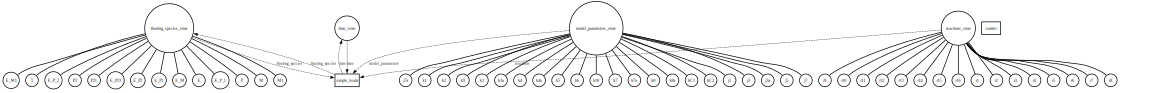

In [16]:
biosim_builder2.visualize()

In [19]:
process_selection = input(f'Which process would you like to get the config for?\nChoose one of the following:\n{prompter.builder_instance.list_processes()}')
process_config = prompter.builder_instance.core.process_registry.get_pydantic_model(process_selection)

process_config.model_dump()

TypeError: argument of type 'NoneType' is not iterable

In [18]:
biosim_builder2.get_pydantic_model('CopasiProcess')

TypeError: argument of type 'NoneType' is not iterable